In [5]:
import numpy as np 
import pandas as pd 
np.random.seed(1)
# get data


In [6]:
train_df=pd.read_csv('digit_train.csv')


In [20]:
test_df=pd.read_csv('digit_test.csv')
test_df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df.shape

(42000, 785)

Text(0, 0.5, 'Frequency')

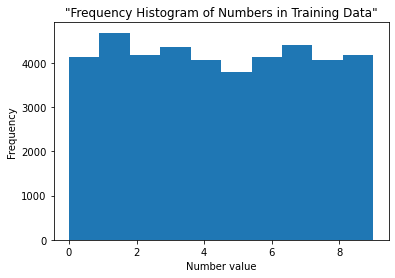

In [12]:
import matplotlib.pyplot as plt
plt.hist(train_df["label"])
plt.title('"Frequency Histogram of Numbers in Training Data"')
plt.xlabel('Number value')
plt.ylabel('Frequency')

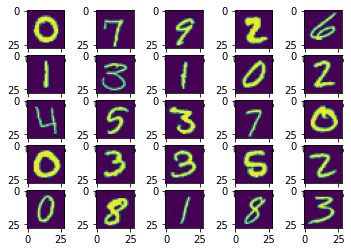

In [15]:
import math
f,ax=plt.subplots(5,5)
for i in range(1,26):
    data=train_df.iloc[i,1:785].values
    grid=data.reshape((28,28))
    n=math.ceil(i/5)-1
    m=[0,1,2,3,4]*5
    ax[m[i-1],n].imshow(grid)

In [23]:
label=train_df['label']
train_df=train_df.drop(['label'],axis=1)

In [24]:
train_df=train_df/255
test_df=test_df/255


In [31]:
train_df['label']=label

Text(0, 0.5, '% of variance explained')

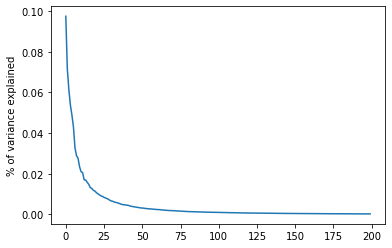

In [32]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=200)
pca.fit(train_df.drop(['label'], axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')


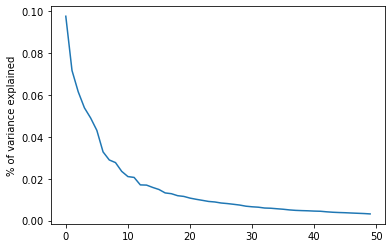

In [41]:
pca = decomposition.PCA(n_components=50)
pca.fit(train_df.drop(['label'], axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
PCtrain = pd.DataFrame(pca.transform(train_df.drop('label', axis=1)))
PCtrain['label'] = train_df['label']
PCtest = pd.DataFrame(pca.transform(test_df))


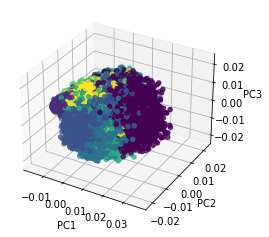

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x =PCtrain[0]
y =PCtrain[1]
z =PCtrain[2]

colors = [int(i % 9) for i in PCtrain['label']]
ax.scatter(x, y, z, c=colors, marker='o', label=colors)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
y = PCtrain['label'][0:20000]
X=PCtrain.drop(['label'], axis=1)[0:20000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(3500,), random_state=1)
clf.fit(X, y)

In [ ]:
from sklearn import  metrics
#accuracy and confusion matrix
predicted = clf.predict(PCtrain.drop('label', axis=1)[20001:42000])
expected = PCtrain['label'][20001:42000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

In [ ]:
output = pd.DataFrame(clf.predict(PCtest), columns =['Label'])
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1
output.to_csv('output.csv', index=False)